# Tuning DNNs (image classification example)

## Libraries

### import all libraries here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import mean_squared_error

## Data

### Load the dataset
Use:

1. from keras.datasets import fashion_mnist
2. (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
2. label_names = ['T-shirt/top','Trouser','Pullover' 'Dress','Coat','Sandal','Shirt','Sneaker' ,'Bag','Ankle boot']

In [ ]:
#code
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
label_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker' ,'Bag','Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


### Check the dataset

In [ ]:
#print the shape of the train and test
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


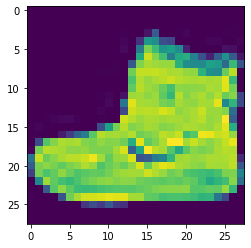

In [ ]:
#plot one image
plt.imshow(X_train[0])

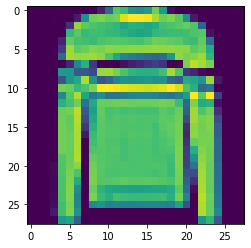

In [ ]:
#plot one image
plt.imshow(X_train[5])

### Reshape the dataset

In [ ]:
#Reshape the data to a one dimensional representation
# Reshape train dataset
n_instances = X_train.shape[0]
X_train = X_train.reshape(n_instances,-1)

# Reshape test dataset
n_instances = X_test.shape[0]
X_test = X_test.reshape(n_instances,-1)

In [ ]:
print('1D X_train: ', X_train.shape)
print('1D X_test: ', X_test.shape)

1D X_train:  (60000, 784)
1D X_test:  (10000, 784)


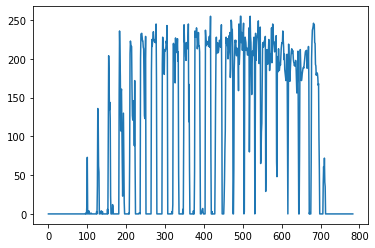

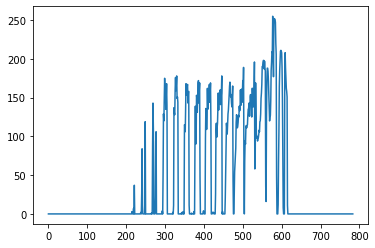

In [ ]:
#plot one instance of the 1-D representation
plt.plot(X_train[0])
plt.show()

plt.plot(X_test[0])
plt.show()

### Plot histograms of the train and test labels

In [ ]:
# Unique values in target variable
print('Unique y_train values', np.unique(y_train))
print('Unique y_test values', np.unique(y_test))

Unique y_train values [0 1 2 3 4 5 6 7 8 9]
Unique y_test values [0 1 2 3 4 5 6 7 8 9]


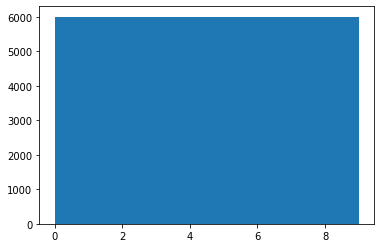

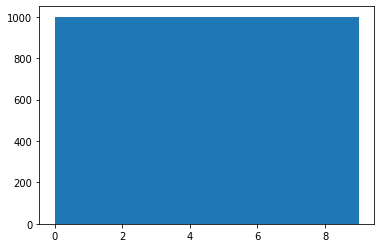

In [ ]:
# Train y_dataset histogram
plt.hist(y_train)
plt.show()

# Test y_dataset histogram
plt.hist(y_test)
plt.show()

In [ ]:
# Target variable distribution
label_names = np.array(label_names)
y_test_names = label_names[y_test]
y_train_names = label_names[y_train]
for name in label_names:
  print('test',name,y_test_names[y_test_names==name].shape)
  print('train',name,y_train_names[y_train_names==name].shape)
  print()

test T-shirt/top (1000,)
train T-shirt/top (6000,)

test Trouser (1000,)
train Trouser (6000,)

test Pullover (1000,)
train Pullover (6000,)

test Dress (1000,)
train Dress (6000,)

test Coat (1000,)
train Coat (6000,)

test Sandal (1000,)
train Sandal (6000,)

test Shirt (1000,)
train Shirt (6000,)

test Sneaker (1000,)
train Sneaker (6000,)

test Bag (1000,)
train Bag (6000,)

test Ankle boot (1000,)
train Ankle boot (6000,)



#### Comment: 

There is an uniform distribution of all classes with both train and test target variables.

### Perform min-max scaling on the data

In [ ]:
#perform min max scaling on the data
#check the old range of values
print('Before scaling')
data_min = X_train.min()
data_max = X_train.max()
print('min: ', data_min)
print('max: ', data_max)
print()

#scaling datasets
X_train_scaled = (X_train - data_min)/(data_max-data_min)
X_test_scaled = (X_test - data_min)/(data_max-data_min)

#check the new range of values
print('After scaling')
data_min_scaled = X_train_scaled.min()
data_max_scaled = X_test_scaled.max()
print('min: ', data_min_scaled)
print('max: ', data_max_scaled)


Before scaling
min:  0
max:  255

After scaling
min:  0.0
max:  1.0


## Baseline models

### Create 2 baselines models (LogisticRegression and RandomForestClassifier)


### Train the baseline models

In [ ]:
#create & train baselines models 

# LogisticRegression
print('Logistic Regression')
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
print()
print('Logistic Regression on scaled dataset')
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_scaled, y_train)

# RandomForestClassifier
print('Random Forest Classifier')
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
print()
print('Random Forest Classifier on scaled dataset')
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_scaled, y_train)

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression on scaled dataset


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Random Forest Classifier

Random Forest Classifier on scaled dataset


RandomForestClassifier(random_state=0)


### Applay the baseline models on the test data

In [ ]:
# Baseline models on test dataset
pred_lr = log_reg.predict(X_test)
pred_lr_scaled = log_reg.predict(X_test_scaled)
pred_rf = rf.predict(X_test)
pred_rf_scaled = rf.predict(X_test_scaled)

### For each baseline model print a confusion matrix and a classification report 

In [ ]:
# Classification report
def print_classification_report(true_y,pred_y,lab_names):
  cm = confusion_matrix(true_y,pred_y)
  print('Confusion matrix')
  print(cm)
  cr = classification_report(y_test,pred_y,target_names = lab_names)
  print()
  print(cr)

In [ ]:
print('=====Logistic Regression Evaluation=====')
lr_report = print_classification_report(y_test, pred_lr, label_names)
lr_report

=====Logistic Regression Evaluation=====
Confusion matrix
[[730  14  26  37  70   0  97   0  25   1]
 [  0 971   0  14  12   0   1   0   2   0]
 [ 11   6 550   4 390   0  25   0  14   0]
 [ 18  45  18 738 146   0  25   0  10   0]
 [  0   1  24   6 960   0   6   0   3   0]
 [  1   1   0   0   1 492   0 142  35 328]
 [ 89   5  95  22 485   0 271   0  33   0]
 [  0   0   0   0   0   1   0 842   2 155]
 [  1   1   2   3  15   1   5   6 965   1]
 [  0   0   0   0   0   0   0  13   1 986]]

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.73      0.79      1000
     Trouser       0.93      0.97      0.95      1000
    Pullover       0.77      0.55      0.64      1000
       Dress       0.90      0.74      0.81      1000
        Coat       0.46      0.96      0.62      1000
      Sandal       1.00      0.49      0.66      1000
       Shirt       0.63      0.27      0.38      1000
     Sneaker       0.84      0.84      0.84      1000
         Bag       0.89

In [ ]:
print('=====Logistic Regression Evaluation on scaled dataset=====')
lr_scaled_report = print_classification_report(y_test, pred_lr_scaled, label_names)
lr_scaled_report

=====Logistic Regression Evaluation on scaled dataset=====
Confusion matrix
[[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.73      0.76      0.74      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.62      0.57      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
     

In [ ]:
print('=====Random Forest Classifier Evaluation=====')
rf_report = print_classification_report(y_test, pred_rf, label_names)
rf_report

=====Random Forest Classifier Evaluation=====
Confusion matrix
[[269   5  38  24   9   0 647   0   8   0]
 [  1 922   9  56   3   0   7   0   2   0]
 [  6   0 733   7 141   0 111   0   2   0]
 [ 14  19  50 813  59   0  42   0   1   2]
 [  0   0 444  45 435   0  75   0   1   0]
 [  1   0   0   0   0 849   0  78  27  45]
 [ 82   2 192  25 273   0 415   0  11   0]
 [  0   0   0   0   0  14   0 838  14 134]
 [  2   2  12  10   4   0  71   3 895   1]
 [  1   0   0   0   0   1   1  54   4 939]]

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.27      0.39      1000
     Trouser       0.97      0.92      0.95      1000
    Pullover       0.50      0.73      0.59      1000
       Dress       0.83      0.81      0.82      1000
        Coat       0.47      0.43      0.45      1000
      Sandal       0.98      0.85      0.91      1000
       Shirt       0.30      0.41      0.35      1000
     Sneaker       0.86      0.84      0.85      1000
         Bag      

In [ ]:
print('=====Random Forest Classifier Evaluation on scaled dataset=====')
rf_scaled_report = print_classification_report(y_test, pred_rf_scaled, label_names)
rf_scaled_report

=====Random Forest Classifier Evaluation on scaled dataset=====
Confusion matrix
[[862   0  12  35   5   1  75   0  10   0]
 [  3 959   3  23   5   0   6   0   1   0]
 [ 13   0 807   8 112   0  58   0   2   0]
 [ 18   2  10 910  29   0  29   0   2   0]
 [  1   0  96  40 807   0  54   0   2   0]
 [  0   0   0   1   0 958   0  30   1  10]
 [149   1 122  26  88   0 598   0  16   0]
 [  0   0   0   0   0  12   0 949   0  39]
 [  0   1   2   4   5   2   8   3 974   1]
 [  0   0   0   0   0   7   1  42   2 948]]

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.60      0.65      1000
     Sneaker       0.93      0.95      0.94      1000


#### Comments:

* Both baseline models provide relatively high prediction accuracy >0.70 on original and > 0.80 on scaled dataset
* In both baseline models trained on the scaled dataset, Precision and Recall scores are also high (>0.70) for all classes, except for class 'Shirt'.


* According to all evaluation metrics Random Forest Classifier has better predictive ability for this dataset. 

## DNN model

### Create a baseline-FC model with 
1. three hidden layers (1024,512 and 256 neurons)
2. loss - sparse_categorical_crossentropy
3.  adam optimizer


In [ ]:
def create_FC_model(input_shape, num_cells, output_shape):
  
  _input = Input(shape = input_shape)
  
  layer =  Dense(num_cells, activation= 'relu')(_input)
  layer =  Dense(num_cells//2, activation= 'relu')(layer)
  layer =  Dense(num_cells//4, activation= 'relu')(layer)
  _output = Dense(output_shape, activation='sigmoid')(layer)

  my_model = Model(inputs=[_input], outputs=[_output])
  my_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return my_model


In [ ]:
#create model and print model summary
input_shape= (X_train.shape[1])
num_cells= 1024
output_shape= len(np.unique(y_test)) 

model = create_FC_model(input_shape, num_cells, output_shape)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


### Train the baseline-FC model 
1. (epochs=50, batch_size=1000)
2.  save the train history
3. use ModelCheckpoint that monitors val_accuracy on X_test 4. save the best model as best_model_base.pt
5. use EarlyStopping woith patience=10

In [ ]:
# train baseline-FC model
path = 'best_model_base.pt' 
callback1 = ModelCheckpoint(path, 
                            monitor='val_accuracy',
                            save_best_only=True, 
                            mode='max', 
                            verbose=1)

callaback2 = EarlyStopping(patience=10)

callback_list = [callback1, callaback2]

train_history_base_FC = model.fit(X_train, y_train, 
                                    epochs=50, 
                                    callbacks=callback_list, 
                                    validation_data=(X_test, y_test), 
                                    batch_size=1000)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 25.0638 - accuracy: 0.6508
Epoch 00001: val_accuracy improved from -inf to 0.75750, saving model to best_model_base.pt
INFO:tensorflow:Assets written to: best_model_base.pt/assets
60/60 [==============================] - 11s 172ms/step - loss: 25.0638 - accuracy: 0.6508 - val_loss: 1.6569 - val_accuracy: 0.7575
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 1.2001 - accuracy: 0.7972
Epoch 00002: val_accuracy improved from 0.75750 to 0.81640, saving model to best_model_base.pt
INFO:tensorflow:Assets written to: best_model_base.pt/assets
60/60 [==============================] - 10s 163ms/step - loss: 1.2001 - accuracy: 0.7972 - val_loss: 0.9307 - val_accuracy: 0.8164
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.8227 - accuracy: 0.8207
Epoch 00003: val_accuracy did not improve from 0.81640
60/60 [==============================] - 9s 149ms/step - loss: 0.8227 - accuracy: 0.8207

### Load best_model_base.pt

In [ ]:
#load  best_model_base.pt and use it on the test data
m_base_FC = load_model('/content/best_model_base.pt')
pred_base_FC = m_base_FC.predict(X_test)
pred_base_FC = np.argmax(pred_base_FC, axis=1)

### Print a confusion matrix and classification report for best_model_base

In [ ]:
print('=====DNN-Base Evaluation=====')
print_classification_report(y_test, pred_base_FC, label_names)

=====DNN-Base Evaluation=====
Confusion matrix
[[940   5   8  11   1   1  27   0   7   0]
 [544 443   0  10   0   0   2   0   1   0]
 [377  10 555  10  20   1  27   0   0   0]
 [393  74  45 470   5   0   8   0   4   1]
 [147  22 628  41 140   0  19   0   3   0]
 [  7   0  10   0   0 978   0   3   0   2]
 [442   8 237  23  68   0 216   0   6   0]
 [  0   0  10   0   0 669   0 320   0   1]
 [126   1  19   1 137  47 123  19 527   0]
 [ 19   0 222   0   0 485   0 207   0  67]]

              precision    recall  f1-score   support

 T-shirt/top       0.31      0.94      0.47      1000
     Trouser       0.79      0.44      0.57      1000
    Pullover       0.32      0.56      0.41      1000
       Dress       0.83      0.47      0.60      1000
        Coat       0.38      0.14      0.20      1000
      Sandal       0.45      0.98      0.61      1000
       Shirt       0.51      0.22      0.30      1000
     Sneaker       0.58      0.32      0.41      1000
         Bag       0.96      0.53 

## DNN model with scaled data, dropout and batchnormalization

### Create a dropout-FC model with
1.  three hidden layers (1024,512 and 256 neurons)
2. a dropout layer after each hidden layer 
3. use same loss and optimizer as for the baseline-FC model


In [ ]:
def create_FC_model(input_shape, num_cells, output_shape ):
  
  _input = Input(shape = input_shape)
  
  layer =  Dense(num_cells, activation= 'relu')(_input)
  layer =  Dense(num_cells//2, activation= 'relu')(layer)
  layer =  Dense(num_cells//4, activation= 'relu')(layer)
  _output = Dense(output_shape, activation='sigmoid')(layer)

  my_model = Model(inputs=[_input], outputs=[_output])
  my_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return my_model

def create_FC_Drop_Batch_model(input_shape, num_cells, output_shape ):
  drop_rate = .3

  _input = Input(input_shape)

  layer = BatchNormalization()(_input)

  layer =  Dense(num_cells, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//2, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//4, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  _output = Dense(output_shape, activation='sigmoid')(layer)
  my_model = Model(inputs=[_input], outputs=[_output])
  my_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return my_model


In [ ]:
#create model and print model summary
input_shape= (X_train_scaled.shape[1])
num_cells= 1024
output_shape= len(np.unique(y_test)) 

# base_FC on scaled dataset
model_scaled = create_FC_model(input_shape, num_cells, output_shape)
FC_summary = model_scaled.summary()
print(FC_summary)
print()

# dropout_FC on scaled dataset
model_scaled_drop_bn = create_FC_Drop_Batch_model(input_shape,num_cells,output_shape)
drop_summary = model_scaled_drop_bn.summary()
print(drop_summary)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________
None

Model: "model_2"
__________________________

### Train the dropout-FC model using 
1. the same training parameters as for the base-FC model (epochs=50, batch_size=1000)
2. save the train history
3. use the same callbacks and save the model as model as best-dropout-FC.pt

In [ ]:
# train base_FC model on scaled dataset
path = 'best_model_base_scaled.pt' 
callback1 = ModelCheckpoint(path, 
                            monitor='val_accuracy',
                            save_best_only=True, 
                            mode='max', 
                            verbose=1)

callaback2 = EarlyStopping(patience=10)
callback_list = [callback1, callaback2]

train_history_base_FC_scaled = model_scaled.fit(X_train_scaled, y_train, 
                                    epochs=50, 
                                    callbacks=callback_list, 
                                    validation_data=(X_test_scaled, y_test), 
                                    batch_size=1000)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.7725
Epoch 00001: val_accuracy improved from -inf to 0.84050, saving model to best_model_base_scaled.pt
INFO:tensorflow:Assets written to: best_model_base_scaled.pt/assets
60/60 [==============================] - 10s 166ms/step - loss: 0.6465 - accuracy: 0.7725 - val_loss: 0.4490 - val_accuracy: 0.8405
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.8594
Epoch 00002: val_accuracy improved from 0.84050 to 0.85950, saving model to best_model_base_scaled.pt
INFO:tensorflow:Assets written to: best_model_base_scaled.pt/assets
60/60 [==============================] - 10s 162ms/step - loss: 0.3941 - accuracy: 0.8594 - val_loss: 0.3915 - val_accuracy: 0.8595
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.3462 - accuracy: 0.8748
Epoch 00003: val_accuracy improved from 0.85950 to 0.86380, saving model to best_model_base_scaled.pt
INFO:tensorflow

In [ ]:
# train dropout_FC model on scaled dataset
path = 'best_dropout_FC.pt' 
callback1 = ModelCheckpoint(path, 
                            monitor='val_accuracy',
                            save_best_only=True, 
                            mode='max', 
                            verbose=1)

callaback2 = EarlyStopping(patience=10)
callback_list = [callback1, callaback2]

train_history_dropout_FC = model_scaled_drop_bn.fit(X_train_scaled, y_train, 
                                    epochs=50, 
                                    callbacks=callback_list, 
                                    validation_data=(X_test_scaled, y_test), 
                                    batch_size=1000)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.7908
Epoch 00001: val_accuracy improved from -inf to 0.71660, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC.pt/assets
60/60 [==============================] - 17s 272ms/step - loss: 0.6139 - accuracy: 0.7908 - val_loss: 0.8784 - val_accuracy: 0.7166
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.4001 - accuracy: 0.8550
Epoch 00002: val_accuracy improved from 0.71660 to 0.78790, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC.pt/assets
60/60 [==============================] - 16s 266ms/step - loss: 0.4001 - accuracy: 0.8550 - val_loss: 0.6421 - val_accuracy: 0.7879
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8712
Epoch 00003: val_accuracy improved from 0.78790 to 0.81170, saving model to best_dropout_FC.pt
INFO:tensorflow:Assets written to: best_dropout_FC

### Load best-dropout-FC.pt and use it on the test data

In [ ]:
#load  best_model_base_scaled.pt and use it on the test data
m_base_FC_scaled = load_model('/content/best_model_base_scaled.pt')
pred_base_FC_scaled = m_base_FC_scaled.predict(X_test_scaled)
pred_base_FC_scaled = np.argmax(pred_base_FC_scaled, axis=1)

#load  best_dropout_FC.pt and use it on the test data
m_dropout_FC_scaled = load_model('/content/best_dropout_FC.pt')
pred_dropout_FC_scaled = m_dropout_FC_scaled.predict(X_test_scaled)
pred_dropout_FC_scaled = np.argmax(pred_dropout_FC_scaled, axis=1)

### Print a confusion matrix and classification report for best-dropout-FC.pt

In [ ]:
print('=====DNN-Base Evaluation on scaled dataset=====')
print_classification_report(y_test, pred_base_FC_scaled, label_names)

=====DNN-Base Evaluation on scaled dataset=====
Confusion matrix
[[884   0   8  18   4   2  80   0   4   0]
 [  4 974   0  16   2   0   3   0   1   0]
 [ 27   1 759  18 103   0  89   0   3   0]
 [ 19   1   4 935  22   0  15   0   4   0]
 [  2   1  47  29 856   0  59   0   6   0]
 [  0   0   0   1   0 967   0  17   1  14]
 [149   0  44  29  79   0 691   0   8   0]
 [  0   0   0   0   0   9   0 973   0  18]
 [  3   0   2   5   1   4   3   5 977   0]
 [  0   0   0   0   0   3   1  36   0 960]]

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.85      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.88      0.76      0.81      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.80      0.86      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.73      0.69      0.71      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag    

In [ ]:
print('=====DNN-Drop-Batch Evaluation on scaled dataset=====')
print_classification_report(y_test, pred_dropout_FC_scaled, label_names)

=====DNN-Drop-Batch Evaluation on scaled dataset=====
Confusion matrix
[[878   2   9  17   4   0  85   0   5   0]
 [  0 978   1  14   4   0   2   0   1   0]
 [ 17   2 828  12  83   1  56   1   0   0]
 [ 20   8   7 910  28   0  25   0   2   0]
 [  2   0  69  32 842   1  53   0   1   0]
 [  0   1   0   0   0 965   0  19   1  14]
 [119   1  75  20  62   0 717   0   6   0]
 [  0   0   0   0   0  11   0 966   0  23]
 [  5   0   4   6   4   1   4   5 971   0]
 [  0   0   0   0   0   4   1  39   0 956]]

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.83      0.83      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.82      0.84      0.83      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.72      0.74      1000
     Sneaker       0.94      0.97      0.95      1000
         B

### Compare the learning curves of best_model_base and best-dropout-FC model
1. Write a few sentences about your interpretation of the learning curves 

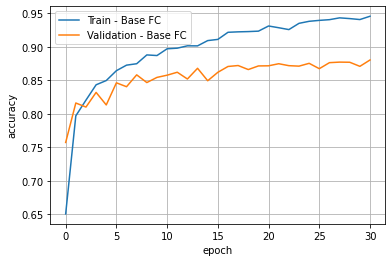

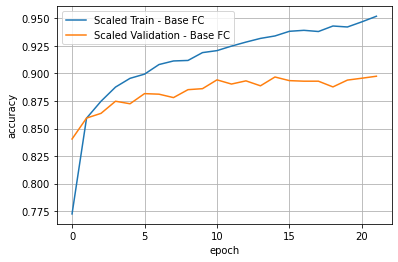

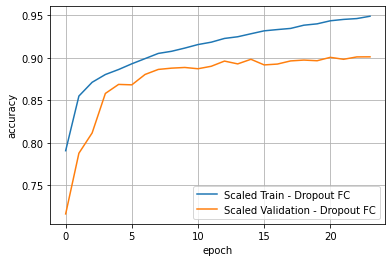

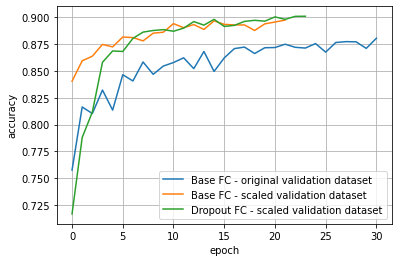

In [ ]:
plt.plot(train_history_base_FC.history['accuracy'],label = 'Train - Base FC')
plt.plot(train_history_base_FC.history['val_accuracy'],label = 'Validation - Base FC')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_base_FC_scaled.history['accuracy'],label = 'Scaled Train - Base FC')
plt.plot(train_history_base_FC_scaled.history['val_accuracy'],label = 'Scaled Validation - Base FC')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_dropout_FC.history['accuracy'],label = 'Scaled Train - Dropout FC')
plt.plot(train_history_dropout_FC.history['val_accuracy'],label = 'Scaled Validation - Dropout FC')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_base_FC.history['val_accuracy'],label = 'Base FC - original validation dataset')
plt.plot(train_history_base_FC_scaled.history['val_accuracy'],label = 'Base FC - scaled validation dataset')
plt.plot(train_history_dropout_FC.history['val_accuracy'],label = 'Dropout FC - scaled validation dataset')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


#### Comments:

In [ ]:
#comments

### Prediciton confidence

For each instance, the best DNN model outputs class-probabilities 
1. remove the test instances for which the highest class-probability is lower than .99
2. we can say that those are instances for wich the model is not nonfident 
3. how many test instances are left?
4. print a confusion matrix and classification report only for the instances for which the model is confident

In [ ]:
cm = confusion_matrix(y_test,pred_dropout_FC_scaled)
score_class = cm.diagonal()/cm.sum(axis=1) 

In [ ]:
scores = pd.DataFrame()
scores['class'] = label_names
scores['class score'] = score_class
scores 

,class,class score
0,T-shirt/top,0.878
1,Trouser,0.978
2,Pullover,0.828
3,Dress,0.910
4,Coat,0.842
5,Sandal,0.965
6,Shirt,0.717
7,Sneaker,0.966
8,Bag,0.971
9,Ankle boot,0.956


#### Comments:
* There is no class with confidence level higher than 0.99.
* The class with highest confidence level is 'Trouser'

In [ ]:
# Filter dataset and select only 'Trouser' instances
train_filter = np.where((y_train == 0 ) | (y_train == 'Trouser'))
test_filter = np.where((y_test == 0) | (y_test == 'Trouser'))

X_train_99, y_train_99 = X_train_scaled[train_filter], y_train[train_filter]
X_test_99, y_test_99 = X_test_scaled[test_filter], y_test[test_filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [ ]:
#Confussion matrix and classification report for the filtered dataset
pred_base_FC_scaled_99 = m_base_FC_scaled.predict(X_test_99)
pred_base_FC_scaled_99 = np.argmax(pred_base_FC_scaled_99, axis=1)

print('=====DNN-Base Evaluation on scaled dataset for the instances for which the model is confident=====')
cm_99 = confusion_matrix(y_test_99,pred_base_FC_scaled_99)
print('Confusion matrix')
print(cm_99[0])

cr_99 = classification_report(y_test_99,pred_base_FC_scaled_99,target_names = 'Trouser', zero_division=0)
print('Classification Report')
print(cm_99)

=====DNN-Base Evaluation on scaled dataset for the instances for which the model is confident=====
Confusion matrix
[884   8  18   4   2  80   4]
Classification Report
[[884   8  18   4   2  80   4]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


In [ ]:
#Confussion matrix and classification report for the filtered dataset
pred_dropout_FC_scaled_99 = m_dropout_FC_scaled.predict(X_test_99)
pred_dropout_FC_scaled_99 = np.argmax(pred_dropout_FC_scaled_99, axis=1)

print('=====DNN-Drop-Batch Evaluation on scaled dataset for the instances for which the model is confident=====')
cm_99 = confusion_matrix(y_test_99,pred_dropout_FC_scaled_99)
print('Confusion matrix')
print(cm_99[0])

cr_99 = classification_report(y_test_99,pred_dropout_FC_scaled_99,target_names = 'Trouser', zero_division=0)
print('Classification Report')
print(cm_99)

=====DNN-Drop-Batch Evaluation on scaled dataset for the instances for which the model is confident=====
Confusion matrix
[878   2   9  17   4  85   5]
Classification Report
[[878   2   9  17   4  85   5]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


In [ ]:
print(pred_dropout_FC_scaled_99.shape)
print(y_test_99.shape)

(1000,)
(1000,)


## Best model

Try to create improved  model by changing some of the parameters of your best model
1. e.g., add batchnormzalization
2. increase/decrease dropupt
3. change learning rate
4. change the optimizer

In [ ]:
def improved_FC_Drop_Batch_model(input_shape, num_cells, output_shape ):
  drop_rate = .1

  _input = Input(input_shape)

  layer = BatchNormalization()(_input)

  layer =  Dense(num_cells, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//2, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//4, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  _output = Dense(output_shape, activation='sigmoid')(layer)
  my_model = Model(inputs=[_input], outputs=[_output])
  my_model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

  return my_model

In [ ]:
# model and print model summary
input_shape= (X_train_scaled.shape[1])
num_cells= 1024
output_shape= len(np.unique(y_test)) 

improved_drop_bn = improved_FC_Drop_Batch_model(input_shape,num_cells,output_shape)
improved_drop_summary = improved_drop_bn.summary()
print(improved_drop_summary)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 batch_normalization_24 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_25 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               5248

In [ ]:
# train dropout_FC model on scaled dataset
path = 'best_improved_dropout_FC.pt' 
callback1 = ModelCheckpoint(path, 
                            monitor='val_accuracy',
                            save_best_only=True, 
                            mode='max', 
                            verbose=1)

callaback2 = EarlyStopping(patience=10)
callback_list = [callback1, callaback2]

train_history_improved_dropout_FC = improved_drop_bn.fit(X_train_scaled, y_train, 
                                    epochs=50, 
                                    callbacks=callback_list, 
                                    validation_data=(X_test_scaled, y_test), 
                                    batch_size=1000)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7974
Epoch 00001: val_accuracy improved from -inf to 0.72630, saving model to best_improved_dropout_FC.pt
INFO:tensorflow:Assets written to: best_improved_dropout_FC.pt/assets
60/60 [==============================] - 18s 273ms/step - loss: 0.6005 - accuracy: 0.7974 - val_loss: 0.9891 - val_accuracy: 0.7263
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.3761 - accuracy: 0.8617
Epoch 00002: val_accuracy improved from 0.72630 to 0.73690, saving model to best_improved_dropout_FC.pt
INFO:tensorflow:Assets written to: best_improved_dropout_FC.pt/assets
60/60 [==============================] - 16s 275ms/step - loss: 0.3761 - accuracy: 0.8617 - val_loss: 0.7288 - val_accuracy: 0.7369
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.8801
Epoch 00003: val_accuracy improved from 0.73690 to 0.79540, saving model to best_improved_dropout_FC.pt
INFO:

In [ ]:
#load  best_improved_dropout_FC.pt and use it on the test data
m_improved_dropout_FC_scaled = load_model('/content/best_improved_dropout_FC.pt')
pred_improved_dropout_FC_scaled = m_improved_dropout_FC_scaled.predict(X_test_scaled)
pred_improved_dropout_FC_scaled = np.argmax(pred_improved_dropout_FC_scaled, axis=1)

In [ ]:
print('=====Improved DNN-Drop-Batch Evaluation on scaled dataset=====')
print_classification_report(y_test, pred_improved_dropout_FC_scaled, label_names)

=====Improved DNN-Drop-Batch Evaluation on scaled dataset=====
Confusion matrix
[[843   0  19  25   7   1  99   0   6   0]
 [  0 983   1  10   4   0   1   0   1   0]
 [ 12   0 814   7  97   0  69   1   0   0]
 [ 12   6  17 892  37   1  30   0   5   0]
 [  0   0  59  19 875   1  45   0   1   0]
 [  0   0   0   0   0 966   0  14   1  19]
 [103   2  65  24  71   1 727   0   7   0]
 [  0   0   0   0   0  25   0 923   0  52]
 [  2   0   4   7   4   3   2   3 975   0]
 [  0   0   0   0   0   6   1  20   0 973]]

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.81      0.82      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.80      0.88      0.84      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.75      0.73      0.74      1000
     Sneaker       0.96      0.92      0.94      1000
 

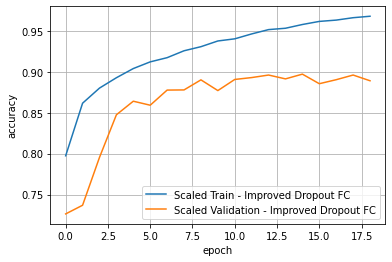

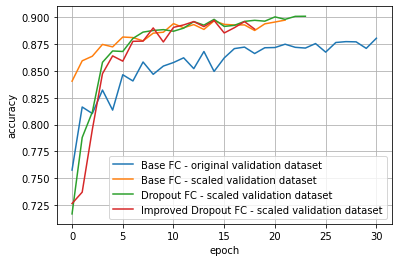

In [ ]:
# Accuracy vizualization
plt.plot(train_history_improved_dropout_FC.history['accuracy'],label = 'Scaled Train - Improved Dropout FC')
plt.plot(train_history_improved_dropout_FC.history['val_accuracy'],label = 'Scaled Validation - Improved Dropout FC')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_base_FC.history['val_accuracy'],label = 'Base FC - original validation dataset')
plt.plot(train_history_base_FC_scaled.history['val_accuracy'],label = 'Base FC - scaled validation dataset')
plt.plot(train_history_dropout_FC.history['val_accuracy'],label = 'Dropout FC - scaled validation dataset')
plt.plot(train_history_improved_dropout_FC.history['val_accuracy'],label = 'Improved Dropout FC - scaled validation dataset')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


In [ ]:
def improved_FC_Drop_Batch_model2(input_shape, num_cells, output_shape ):
  drop_rate = .5

  _input = Input(input_shape)

  layer = BatchNormalization()(_input)

  layer =  Dense(num_cells, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//2, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  layer =  Dense(num_cells//4, activation= 'relu')(layer)
  layer = BatchNormalization()(layer)
  layer = Dropout(drop_rate)(layer)

  _output = Dense(output_shape, activation='sigmoid')(layer)
  my_model = Model(inputs=[_input], outputs=[_output])
  my_model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

  return my_model

In [ ]:
# model and print model summary
input_shape= (X_train_scaled.shape[1])
num_cells= 1024
output_shape= len(np.unique(y_test)) 

improved2_drop_bn = improved_FC_Drop_Batch_model2(input_shape,num_cells,output_shape)
improved2_drop_summary = improved2_drop_bn.summary()
print(improved2_drop_summary)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 batch_normalization_20 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_28 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_21 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               5248

In [ ]:
# train dropout_FC model on scaled dataset
path = 'best_improved2_dropout_FC.pt' 
callback1 = ModelCheckpoint(path, 
                            monitor='val_accuracy',
                            save_best_only=True, 
                            mode='max', 
                            verbose=1)

callaback2 = EarlyStopping(patience=10)
callback_list = [callback1, callaback2]

train_history_improved2_dropout_FC = improved2_drop_bn.fit(X_train_scaled, y_train, 
                                    epochs=50, 
                                    callbacks=callback_list, 
                                    validation_data=(X_test_scaled, y_test), 
                                    batch_size=1000)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.7455 - accuracy: 0.7535
Epoch 00001: val_accuracy improved from -inf to 0.74080, saving model to best_improved2_dropout_FC.pt
INFO:tensorflow:Assets written to: best_improved2_dropout_FC.pt/assets
60/60 [==============================] - 19s 296ms/step - loss: 0.7455 - accuracy: 0.7535 - val_loss: 0.8282 - val_accuracy: 0.7408
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.8225
Epoch 00002: val_accuracy improved from 0.74080 to 0.75780, saving model to best_improved2_dropout_FC.pt
INFO:tensorflow:Assets written to: best_improved2_dropout_FC.pt/assets
60/60 [==============================] - 16s 271ms/step - loss: 0.4912 - accuracy: 0.8225 - val_loss: 0.6292 - val_accuracy: 0.7578
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.4295 - accuracy: 0.8463
Epoch 00003: val_accuracy improved from 0.75780 to 0.81690, saving model to best_improved2_dropout_FC.pt


In [ ]:
#load  best_improved_dropout_FC.pt and use it on the test data
m_improved2_dropout_FC_scaled = load_model('/content/best_improved2_dropout_FC.pt')
pred_improved2_dropout_FC_scaled = m_improved2_dropout_FC_scaled.predict(X_test_scaled)
pred_improved2_dropout_FC_scaled = np.argmax(pred_improved2_dropout_FC_scaled, axis=1)

In [ ]:
print('=====Improved DNN-Drop-Batch Evaluation on scaled dataset=====')
print_classification_report(y_test, pred_improved2_dropout_FC_scaled, label_names)

=====Improved DNN-Drop-Batch Evaluation on scaled dataset=====
Confusion matrix
[[837   2  13  21   2   1 120   0   4   0]
 [  1 981   1  12   2   0   2   0   1   0]
 [ 16   1 810  15  83   0  75   0   0   0]
 [ 15   4   6 918  30   0  23   0   4   0]
 [  1   0  70  29 824   0  75   0   1   0]
 [  0   0   0   1   0 958   0  30   1  10]
 [ 94   0  54  28  55   0 761   0   8   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  2   0   4   5   0   2   7   5 975   0]
 [  0   0   0   0   0   7   1  43   0 949]]

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.81      0.83      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.72      0.76      0.74      1000
     Sneaker       0.93      0.98      0.95      1000
 

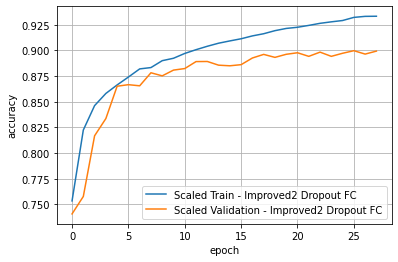

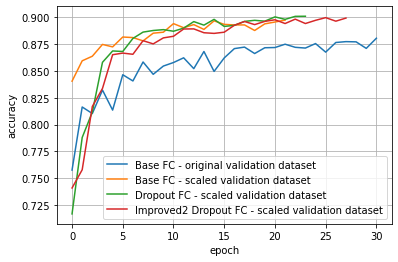

In [ ]:
# Accuracy vizualization
plt.plot(train_history_improved2_dropout_FC.history['accuracy'],label = 'Scaled Train - Improved2 Dropout FC')
plt.plot(train_history_improved2_dropout_FC.history['val_accuracy'],label = 'Scaled Validation - Improved2 Dropout FC')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history_base_FC.history['val_accuracy'],label = 'Base FC - original validation dataset')
plt.plot(train_history_base_FC_scaled.history['val_accuracy'],label = 'Base FC - scaled validation dataset')
plt.plot(train_history_dropout_FC.history['val_accuracy'],label = 'Dropout FC - scaled validation dataset')
plt.plot(train_history_improved2_dropout_FC.history['val_accuracy'],label = 'Improved2 Dropout FC - scaled validation dataset')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
